In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 159.4 MB 32 kB/s 
     |████████████████████████████████| 11.8 MB 47.1 MB/s 
     |████████████████████████████████| 7.6 MB 4.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Step 2: Image loading and text recognition using EasyOCR
im_1_path = './sample_data/images/1_carplate.jpg'
im_2_path = './sample_data/images/2_digits.jpg'
im_3_path = './sample_data/images/3_handwriting.jpg'
im_4_path = './sample_data/images/4_invoice.jpg'

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
result

[([[325, 169], [477, 169], [477, 207], [325, 207]],
  'MH 20 EE 7598',
  0.9297749338159735),
 ([[445, 323], [487, 323], [487, 337], [445, 337]],
  'WWW:',
  0.3776898629031007),
 ([[482, 320], [597, 320], [597, 338], [482, 338]],
  'drivespark com',
  0.9024028926740845)]

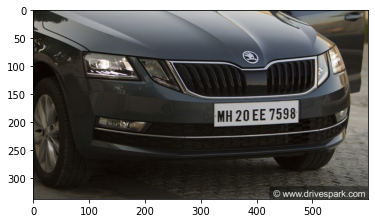

In [ ]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
#Step 3: Overlay recognized text on image using OpenCV
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./sample_data/output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: MH 20 EE 7598 (Probability: 0.93)
Detected text: drivespark com (Probability: 0.90)


<Figure size 432x288 with 0 Axes>

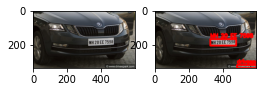

In [ ]:
overlay_ocr_text(im_1_path, '1_carplate')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: BRAND NAME (Probability: 1.00)
Detected text: INVOICE (Probability: 0.98)
Detected text: AMOUNT (Probability: 1.00)
Detected text: S320.00 (Probability: 0.92)
Detected text: Invoice (Probability: 0.69)
Detected text: Ostin Parker (Probability: 0.86)
Detected text: Invoice # 115662 (Probability: 0.93)
Detected text: 66 Avenue any street; (Probability: 0.62)
Detected text: City name; State; US (Probability: 0.67)
Detected text: Date  03/12/2022 (Probability: 0.50)
Detected text: ITEM DESCRIPTION (Probability: 0.90)
Detected text: QTY (Probability: 0.90)
Detected text: PRICE (Probability: 1.00)
Detected text: TOTAL (Probability: 1.00)
Detected text: Lorem ipsum dolor sit amet (Probability: 0.85)
Detected text: S20.00 (Probability: 0.67)
Detected text: S40.00 (Probability: 0.67)
Detected text: Maecenas dapibus quis ipsum (Probability: 0.76)
Detected text: S10.00 (Probability: 0.91)
Detected text: S10.00 (Probability: 0.93)
Detected text: Cras ullamcorper odio (Probability: 0

<Figure size 432x288 with 0 Axes>

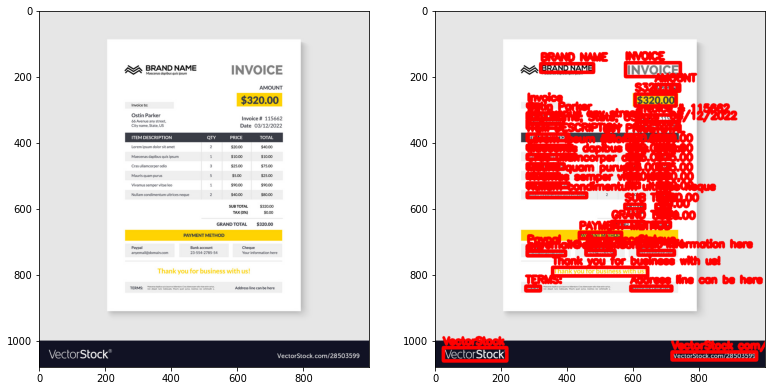

In [ ]:
overlay_ocr_text(im_4_path, '4_invoice')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: 123 (Probability: 1.00)
Detected text: 45 6 (Probability: 0.60)
Detected text: 789 (Probability: 0.85)


<Figure size 432x288 with 0 Axes>

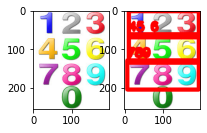

In [ ]:
overlay_ocr_text(im_2_path, '2_digits')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: i9 (Probability: 0.87)
Detected text: Wle_think_Sonetimes_that (Probability: 0.53)
Detected text: homeless (Probability: 0.76)
Detected text: only_being_hungry + (Probability: 0.79)
Detected text: oE_being (Probability: 0.63)
Detected text: The (Probability: 0.80)
Detected text: is_He (Probability: 0.72)
Detected text: in (Probability: 0.99)
Detected text: this (Probability: 0.58)
Detected text: remedy (Probability: 1.00)
Detected text: poverly (Probability: 0.54)
Detected text: and (Probability: 0.97)
Detected text: naked (Probability: 0.99)
Detected text: unlaved (Probability: 0.96)
Detected text: Poverty (Probability: 0.87)
Detected text: povert (Probability: 0.54)
Detected text: grealest (Probability: 0.96)
Detected text: uncared (Probability: 0.99)
Detected text: wate (Probability: 0.99)
Detected text: and (Probability: 1.00)
Detected text: our (Probability: 0.56)
Detected text: musk (Probability: 0.87)
Detected text: We (Probability: 1.00)
Detected text: kind (Prob

<Figure size 432x288 with 0 Axes>

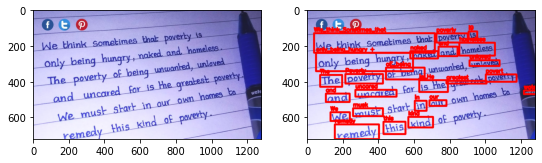

In [ ]:
overlay_ocr_text(im_3_path, '3_handwriting')